### Reproduce Results for English Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle

In [2]:
def cleantext(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [3]:
with open("LR_Model_English.pkl", 'rb') as file:  
    LR = pickle.load(file)
    
with open("DT_Model_English.pkl", 'rb') as file:  
    DT = pickle.load(file)
    
with open("GBC_Model_English.pkl", 'rb') as file:  
    GBC = pickle.load(file)
    
with open("RFC_Model_English.pkl", 'rb') as file:  
    RFC = pickle.load(file)

In [4]:
df = pd.read_csv("EnglishProcessedDataset.csv")
df["article"] = df["article"].apply(cleantext)
x = df["article"]
y = df["label"]
y=y.astype('int')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 12)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [7]:
def LR_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    return pred_LR[0]

def DT_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    return pred_DT[0]

def GBC_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_GBC = GBC.predict(new_xv_test)
    return pred_GBC[0]
    
def RFC_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cleantext) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RFC.predict(new_xv_test)
    return pred_RFC[0]
    
def classify_result(correct,prediction):
    if correct == 1 and prediction == 1:
        return "True Positive"
    elif correct == 1 and prediction == 0:
        return "False Negative"
    elif correct == 0 and prediction == 0:
        return "True Negative"
    elif correct == 0 and prediction == 1:
        return "False Positive"

In [8]:
analysis_df = df = pd.read_csv("EnglishTestDataset.csv")

analysis_df.loc[:,["LR"]] = analysis_df["article"].apply(LR_test)
analysis_df.loc[:,["LR"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["LR"])

analysis_df.loc[:,["DT"]] = analysis_df["article"].apply(DT_test)
analysis_df.loc[:,["DT"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["DT"])

analysis_df.loc[:,["GBC"]] = analysis_df["article"].apply(GBC_test)
analysis_df.loc[:,["GBC"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["GBC"])

analysis_df.loc[:,["RFC"]] = analysis_df["article"].apply(RFC_test)
analysis_df.loc[:,["RFC"]] = np.vectorize(classify_result)(analysis_df["label"],analysis_df["RFC"])

In [9]:
LR_analysis_df = analysis_df.groupby("LR")["LR"].count().to_frame()
LR_analysis_df.rename(columns={"LR":"count"},inplace=True)
LR_analysis_df.reset_index(inplace=True)
LR_analysis_x = np.array(LR_analysis_df["LR"])
LR_analysis_y = np.array(LR_analysis_df["count"])

DT_analysis_df = analysis_df.groupby("DT")["DT"].count().to_frame()
DT_analysis_df.rename(columns={"DT":"count"},inplace=True)
DT_analysis_df.reset_index(inplace=True)
DT_analysis_x = np.array(DT_analysis_df["DT"])
DT_analysis_y = np.array(DT_analysis_df["count"])

GBC_analysis_df = analysis_df.groupby("GBC")["GBC"].count().to_frame()
GBC_analysis_df.rename(columns={"GBC":"count"},inplace=True)
GBC_analysis_df.reset_index(inplace=True)
GBC_analysis_x = np.array(GBC_analysis_df["GBC"])
GBC_analysis_y = np.array(GBC_analysis_df["count"])

RFC_analysis_df = analysis_df.groupby("RFC")["RFC"].count().to_frame()
RFC_analysis_df.rename(columns={"RFC":"count"},inplace=True)
RFC_analysis_df.reset_index(inplace=True)
RFC_analysis_x = np.array(RFC_analysis_df["RFC"])
RFC_analysis_y = np.array(RFC_analysis_df["count"])

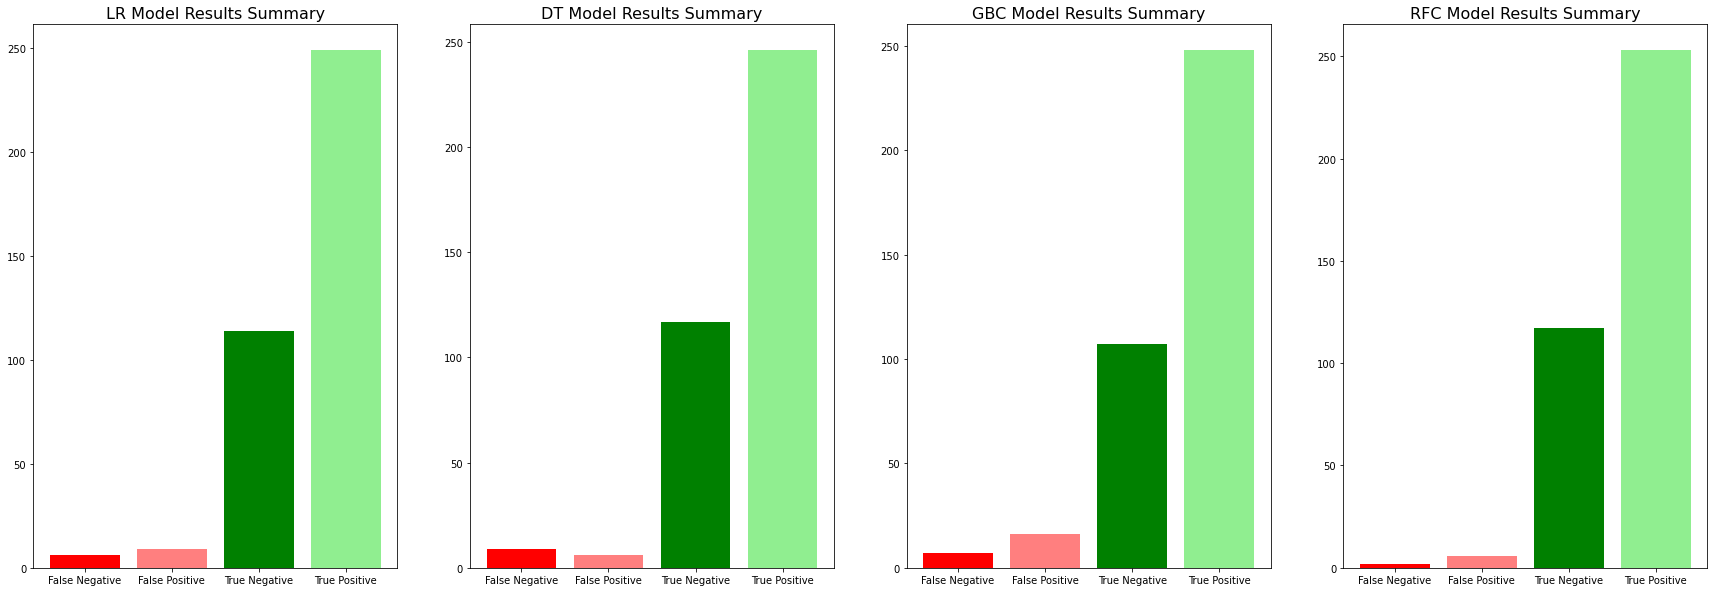

<Figure size 792x432 with 0 Axes>

In [10]:
def set_color(result):
    if result == "False Negative":
        return "red"
    elif result == "False Positive":
        return "#FF7F7F"
    elif result == "True Negative":
        return "green"
    elif result == "True Positive":
        return "#90EE90"

fig,ax = plt.subplots(1,4)
plt.figure(figsize = (11,6))
fig.set_size_inches(30,10)

ax[0].bar(height= LR_analysis_y,x=LR_analysis_x,color= [set_color(i) for i in LR_analysis_x])
ax[0].set_title("LR Model Results Summary",fontsize=16)
ax[1].bar(height = DT_analysis_y,x=DT_analysis_x,color= [set_color(i) for i in DT_analysis_x])
ax[1].set_title("DT Model Results Summary",fontsize=16)
ax[2].bar(height= GBC_analysis_y,x=GBC_analysis_x,color= [set_color(i) for i in GBC_analysis_x])
ax[2].set_title("GBC Model Results Summary",fontsize=16)
ax[3].bar(height = RFC_analysis_y,x=RFC_analysis_x,color= [set_color(i) for i in RFC_analysis_x])
ax[3].set_title("RFC Model Results Summary",fontsize=16)
fig.savefig("EnglishBarGraph.png")

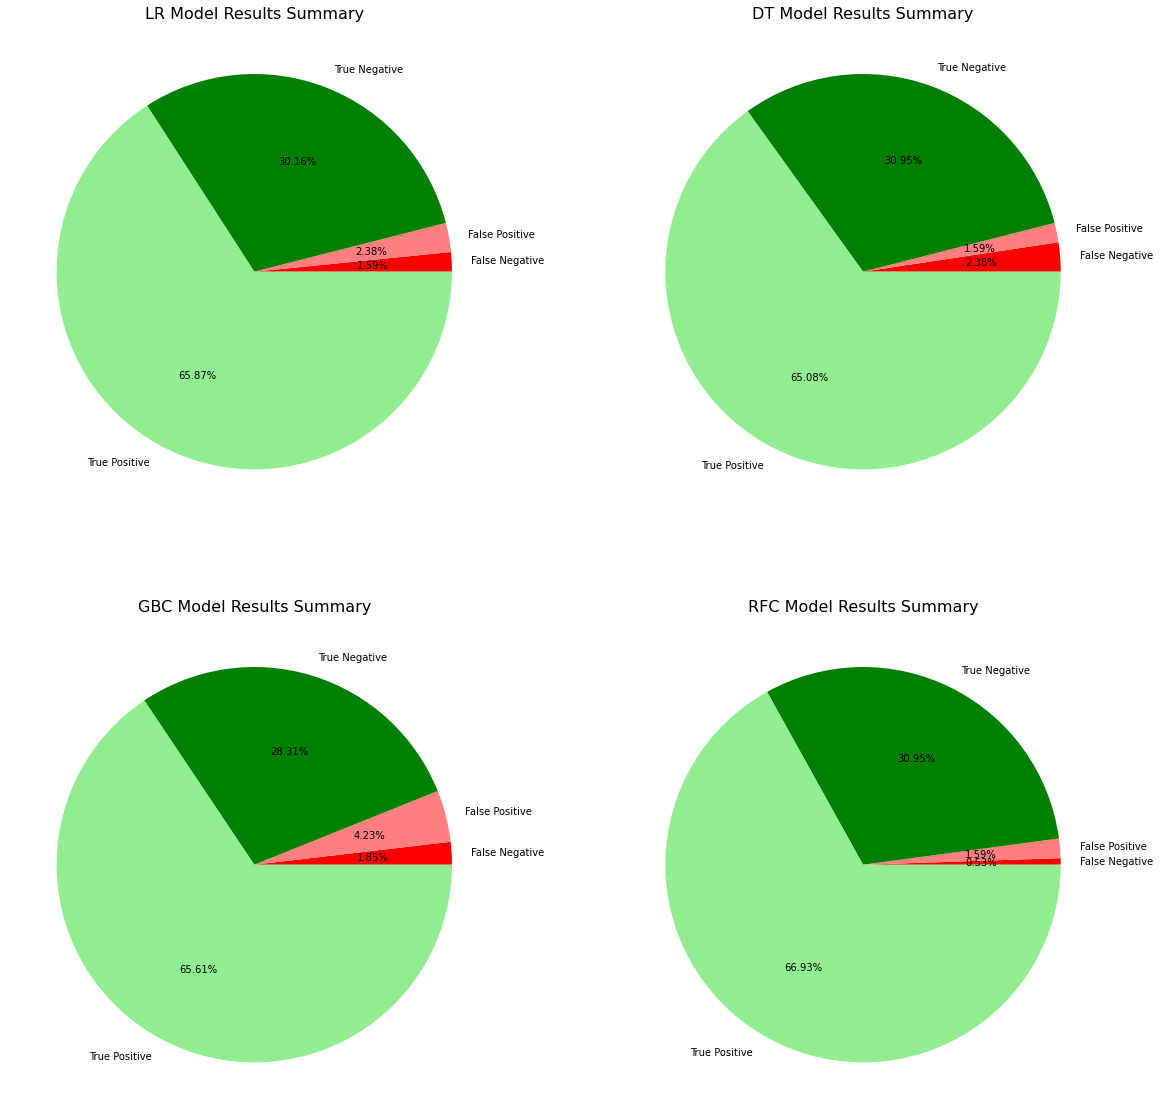

<Figure size 432x432 with 0 Axes>

In [11]:
fig,ax = plt.subplots(2,2)
plt.figure(figsize = (6,6))
fig.set_size_inches(20,20)

ax[0,0].pie(LR_analysis_y,labels=LR_analysis_x,colors=[set_color(i) for i in LR_analysis_x],autopct='%1.2f%%')
ax[0,0].set_title("LR Model Results Summary",fontsize=16)
ax[0,1].pie(DT_analysis_y,labels=DT_analysis_x,colors=[set_color(i) for i in DT_analysis_x],autopct='%1.2f%%')
ax[0,1].set_title("DT Model Results Summary",fontsize=16)
ax[1,0].pie(GBC_analysis_y,labels=GBC_analysis_x,colors=[set_color(i) for i in GBC_analysis_x],autopct='%1.2f%%')
ax[1,0].set_title("GBC Model Results Summary",fontsize=16)
ax[1,1].pie(RFC_analysis_y,labels=RFC_analysis_x,colors=[set_color(i) for i in RFC_analysis_x],autopct='%1.2f%%')
ax[1,1].set_title("RFC Model Results Summary",fontsize=16)
plt.show()
fig.savefig("EnglishPieChart.png")

In [ ]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing():
    news = str(input("Paste article text here:"))
    return print(f'''
             LR Prediction: {output_label(LR_test(news))} 
             DT Prediction: {output_label(DT_test(news))} 
             GBC Prediction: {output_label(GBC_test(news))} 
             RFC Prediction: {output_label(RFC_test(news))}''')

manual_testing()